In [1]:
# https://www.kaggle.com/code/faressayah/ensemble-ml-algorithms-bagging-boosting-voting/notebook 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading data
df = pd.read_csv("../input/divorce.csv")

# Display first 5 lines
df.head()

,Sorry_end,Ignore_diff,begin_correct,Contact,Special_time,No_home_time,2_strangers,enjoy_holiday,enjoy_travel,common_goals,...,silence_for_harm,silence_fear_anger,I'm_right,accusations,I'm_not_guilty,I'm_not_wrong,no_hesitancy_inadequate,you're_inadequate,incompetence,Divorce_Y_N
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [3]:
# Informations about the dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Sorry_end                      170 non-null    int64
 1   Ignore_diff                    170 non-null    int64
 2   begin_correct                  170 non-null    int64
 3   Contact                        170 non-null    int64
 4   Special_time                   170 non-null    int64
 5   No_home_time                   170 non-null    int64
 6   2_strangers                    170 non-null    int64
 7   enjoy_holiday                  170 non-null    int64
 8   enjoy_travel                   170 non-null    int64
 9   common_goals                   170 non-null    int64
 10  harmony                        170 non-null    int64
 11  freeom_value                   170 non-null    int64
 12  entertain                      170 non-null    int64
 13  people_goals        

In [4]:
# Generate descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sorry_end,170.0,1.776471,1.627257,0.0,0.0,2.0,3.0,4.0
Ignore_diff,170.0,1.652941,1.468654,0.0,0.0,2.0,3.0,4.0
begin_correct,170.0,1.764706,1.415444,0.0,0.0,2.0,3.0,4.0
Contact,170.0,1.482353,1.504327,0.0,0.0,1.0,3.0,4.0
Special_time,170.0,1.541176,1.632169,0.0,0.0,1.0,3.0,4.0
No_home_time,170.0,0.747059,0.904046,0.0,0.0,0.0,1.0,4.0
2_strangers,170.0,0.494118,0.898698,0.0,0.0,0.0,1.0,4.0
enjoy_holiday,170.0,1.452941,1.546371,0.0,0.0,1.0,3.0,4.0
enjoy_travel,170.0,1.458824,1.557976,0.0,0.0,1.0,3.0,4.0
common_goals,170.0,1.576471,1.421529,0.0,0.0,2.0,3.0,4.0


In [5]:
# preprocessing data to see if they are any missing values
df.isnull().sum().sum()

0

In [6]:
# splitting data arrays into two subsets: for training data and for testing data

from sklearn.model_selection import train_test_split

X = df.drop(['Divorce_Y_N'],axis=1)
y = df.Divorce_Y_N

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)

In [7]:
# display format

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:")
    CMtraining = sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True,cmap="icefire")
    plt.show(CMtraining)
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("\n")
    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    CMtest = sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True,cmap="icefire")
    print(f"CONFUSION MATRIX:")
    CMtest = sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True,cmap="icefire")
    plt.show(CMtest)
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

TRAINIG RESULTS: 
CONFUSION MATRIX:


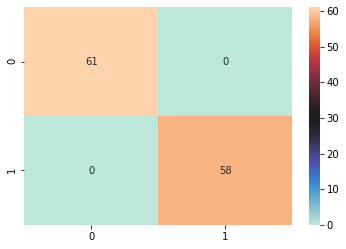

ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision   1.0   1.0       1.0        1.0           1.0
recall      1.0   1.0       1.0        1.0           1.0
f1-score    1.0   1.0       1.0        1.0           1.0
support    61.0  58.0       1.0      119.0         119.0


TESTING RESULTS: 
CONFUSION MATRIX:


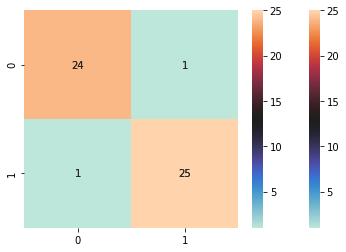

ACCURACY SCORE:
0.9608
CLASSIFICATION REPORT:
               0          1  accuracy  macro avg  weighted avg
precision   0.96   0.961538  0.960784   0.960769      0.960784
recall      0.96   0.961538  0.960784   0.960769      0.960784
f1-score    0.96   0.961538  0.960784   0.960769      0.960784
support    25.00  26.000000  0.960784  51.000000     51.000000


In [8]:
# Predicting Divorce using Bagging Classifier

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=tree, n_estimators=1500, random_state=42)
bagging_clf.fit(X_train, y_train)

evaluate(bagging_clf, X_train, X_test, y_train, y_test)
bagging_clf_score_test = bagging_clf.score(X_test, y_test)
bagging_clf_score_train = bagging_clf.score(X_train, y_train)

In [9]:
# Create the model for the website
import joblib
joblib.dump(bagging_clf, "../website/model/bagging_classifier.pkl")

['../website/model/bagging_classifier.pkl']

TRAINIG RESULTS: 
CONFUSION MATRIX:


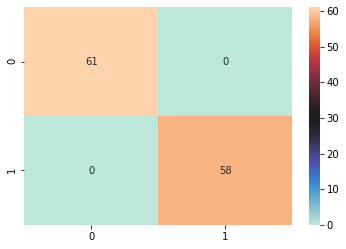

ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision   1.0   1.0       1.0        1.0           1.0
recall      1.0   1.0       1.0        1.0           1.0
f1-score    1.0   1.0       1.0        1.0           1.0
support    61.0  58.0       1.0      119.0         119.0


TESTING RESULTS: 
CONFUSION MATRIX:


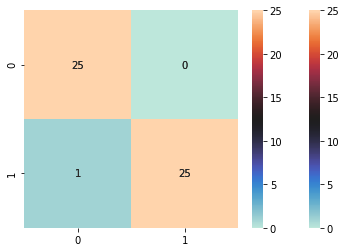

ACCURACY SCORE:
0.9804
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.961538   1.000000  0.980392   0.980769      0.981146
recall      1.000000   0.961538  0.980392   0.980769      0.980392
f1-score    0.980392   0.980392  0.980392   0.980392      0.980392
support    25.000000  26.000000  0.980392  51.000000     51.000000


In [10]:
# Predicting Divorce using RandomForest Classifier

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42, n_estimators=1000)
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)
rf_clf_score_test = rf_clf.score(X_test, y_test)
rf_clf_score_train = rf_clf.score(X_train, y_train)

In [11]:
# Create the model for the website
import joblib
joblib.dump(rf_clf, "../website/model/bagging_randomforest.pkl")

['../website/model/bagging_randomforest.pkl']

TRAINIG RESULTS: 
CONFUSION MATRIX:


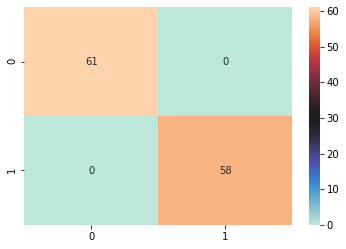

ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision   1.0   1.0       1.0        1.0           1.0
recall      1.0   1.0       1.0        1.0           1.0
f1-score    1.0   1.0       1.0        1.0           1.0
support    61.0  58.0       1.0      119.0         119.0


TESTING RESULTS: 
CONFUSION MATRIX:


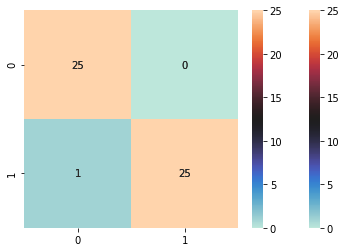

ACCURACY SCORE:
0.9804
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.961538   1.000000  0.980392   0.980769      0.981146
recall      1.000000   0.961538  0.980392   0.980769      0.980392
f1-score    0.980392   0.980392  0.980392   0.980392      0.980392
support    25.000000  26.000000  0.980392  51.000000     51.000000


In [12]:
# Predicting Divorce using ExtraTrees Classifier

from sklearn.ensemble import ExtraTreesClassifier

ex_tree_clf = ExtraTreesClassifier(n_estimators=1000, max_features=7, random_state=42)
ex_tree_clf.fit(X_train, y_train)
evaluate(ex_tree_clf, X_train, X_test, y_train, y_test)
ex_tree_clf_score_test = ex_tree_clf.score(X_test, y_test)
ex_tree_clf_score_train = ex_tree_clf.score(X_train, y_train)

In [13]:
# Create the model for the website
import joblib
joblib.dump(ex_tree_clf, "../website/model/bagging_extratrees.pkl")

['../website/model/bagging_extratrees.pkl']

In [14]:
# Ordering the precision test accuracy result of our models
scores = [['Random Forest',rf_clf_score_train,rf_clf_score_test],
          ['Bagging Classifier',bagging_clf_score_train,bagging_clf_score_test],
          ['Extra Trees',ex_tree_clf_score_train,ex_tree_clf_score_test]
         ]

score_df = pd.DataFrame(scores, columns = ['Model Name', 'TrainScore' , 'TestScore']) 
score_df.sort_values(by=["TestScore"], ascending = False)

,Model Name,TrainScore,TestScore
0,Random Forest,1.0,0.980392
2,Extra Trees,1.0,0.980392
1,Bagging Classifier,1.0,0.960784
